In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Read df

In [12]:
medical = pd.read_csv("results/medical_exam.csv")
medical_failure = pd.read_csv("results/medical_exam_failure_modes.csv")


# Data Cleaning/ Removing models do to deprecation
dpr = ["gpt-3.5-turbo-0613", "gpt-3.5-turbo-0613"]
for model in dpr:
    medical = medical.drop(medical.query("model_name == @model").index)
    medical_failure = medical_failure.drop(medical_failure.query("model_name == @model").index)
    
    
display(medical.query("subtask == 'dichotomous:biochemistry:de'"))
display(medical_failure.query("subtask == 'dichotomous:biochemistry:de'"))    


,model_name,subtask,score,iterations,md5_hash,datetime,biochatter_version
0,chatglm3:6:ggmlv3:q4_0,dichotomous:biochemistry:de,1;0;1/1,3,83f6992f3680ef2c7a4ccf529994c746,2024-06-18 11:08:20,0.4.11
1,chatglm3:6:ggmlv3:q4_0,dichotomous:biochemistry:de,0;0;0/1,3,a077c65c160ec20d3f631b44e709d753,2024-06-18 11:20:09,0.4.11
257,gpt-3.5-turbo-0125,dichotomous:biochemistry:de,1;1;1/1,3,83f6992f3680ef2c7a4ccf529994c746,2024-06-18 17:14:34,0.4.11
258,gpt-3.5-turbo-0125,dichotomous:biochemistry:de,0;0;0/1,3,a077c65c160ec20d3f631b44e709d753,2024-06-18 17:15:02,0.4.11
771,gpt-4-0125-preview,dichotomous:biochemistry:de,1;1;1/1,3,83f6992f3680ef2c7a4ccf529994c746,2024-06-18 17:36:04,0.4.11
...,...,...,...,...,...,...,...
9253,openhermes-2.5:7:ggufv2:Q5_K_M,dichotomous:biochemistry:de,0;0;0/1,3,a077c65c160ec20d3f631b44e709d753,2024-06-20 13:29:59,0.4.11
9509,openhermes-2.5:7:ggufv2:Q6_K,dichotomous:biochemistry:de,0;0;0/1,3,83f6992f3680ef2c7a4ccf529994c746,2024-06-20 13:37:52,0.4.11
9510,openhermes-2.5:7:ggufv2:Q6_K,dichotomous:biochemistry:de,0;0;0/1,3,a077c65c160ec20d3f631b44e709d753,2024-06-20 13:38:10,0.4.11
9766,openhermes-2.5:7:ggufv2:Q8_0,dichotomous:biochemistry:de,0;0;0/1,3,83f6992f3680ef2c7a4ccf529994c746,2024-06-20 13:46:32,0.4.11


,model_name,subtask,actual_answer,expected_answer,failure_modes,md5_hash,datetime
0,chatglm3:6:ggmlv3:q4_0,dichotomous:biochemistry:de,"ja, das stimmt",ja,Partial Match,83f6992f3680ef2c7a4ccf529994c746,2024-06-18 11:08:20
1,chatglm3:6:ggmlv3:q4_0,dichotomous:biochemistry:de,ja,nein,Other,a077c65c160ec20d3f631b44e709d753,2024-06-18 11:20:09
200,gpt-3.5-turbo-0125,dichotomous:biochemistry:de,ja,nein,Other,a077c65c160ec20d3f631b44e709d753,2024-06-18 17:15:02
549,gpt-4-0125-preview,dichotomous:biochemistry:de,ja,nein,Other,a077c65c160ec20d3f631b44e709d753,2024-06-18 17:36:36
631,gpt-4-0613,dichotomous:biochemistry:de,ja,nein,Other,a077c65c160ec20d3f631b44e709d753,2024-06-18 18:00:03
811,llama-2-chat:13:ggufv2:Q2_K,dichotomous:biochemistry:de,ja,nein,Other,a077c65c160ec20d3f631b44e709d753,2024-06-18 18:46:14
1012,llama-2-chat:13:ggufv2:Q3_K_M,dichotomous:biochemistry:de,ja,nein,Other,a077c65c160ec20d3f631b44e709d753,2024-06-18 19:25:10
1208,llama-2-chat:13:ggufv2:Q4_K_M,dichotomous:biochemistry:de,ja,nein,Other,a077c65c160ec20d3f631b44e709d753,2024-06-18 12:30:13
1403,llama-2-chat:13:ggufv2:Q5_K_M,dichotomous:biochemistry:de,ja,nein,Other,a077c65c160ec20d3f631b44e709d753,2024-06-18 20:05:10
1597,llama-2-chat:13:ggufv2:Q6_K,dichotomous:biochemistry:de,ja,nein,Other,a077c65c160ec20d3f631b44e709d753,2024-06-18 20:52:52


In [13]:
def score_helper(df):
    raw_results = df.copy()
    raw_results["score_possible"] = raw_results["score"].apply(
        lambda x: float(x.split("/")[1])
    )
    raw_results["scores"] = raw_results["score"].apply(
        lambda x: x.split("/")[0]
    )
    raw_results["score_achieved_total"] = raw_results["scores"].apply(
        lambda x: np.sum([float(score) for score in x.split(";")])
    )
    raw_results["iteration_scores"] = raw_results["scores"].apply(
        lambda x: [float(score) for score in x.split(";")]
    )
    raw_results["iteration_index"] = raw_results["iteration_scores"].apply(
        lambda x: list(range(1, len(x) + 1))
    )
    
    # Explode the iteration scores and iteration index to have a row for each iteration
    exploded_results = raw_results.explode(["iteration_scores", "iteration_index"])
    exploded_results["iteration_scores"] = exploded_results["iteration_scores"].astype(float)
    exploded_results["iteration_index"] = exploded_results["iteration_index"].astype(int)
    
    aggregated_results_iteration = exploded_results.groupby(["model_name", "iteration_index"]).agg(
        score_possible=("score_possible", "sum"),
        score_achieved_total=("iteration_scores", "sum"),
    ).reset_index()
    
    aggregated_scores = raw_results.groupby(["model_name"]).agg(
        score_possible=("score_possible", "sum"),
        score_achieved_total=("score_achieved_total", "sum"),
        iterations=("iterations", "first")
    ).reset_index()
    
   
    aggregated_scores['score_possible_total'] = aggregated_scores['score_possible'] * raw_results.iloc[:, 3][0]
    aggregated_scores['score_achieved_avg'] = aggregated_scores['score_achieved_total'] / raw_results.iloc[:, 3][0]
    
    std_results = aggregated_results_iteration.groupby(["model_name"])["score_achieved_total"].std().reset_index()
    aggregated_scores['score_achieved_std'] = std_results.iloc[:,1]
    
    return  raw_results, aggregated_scores, aggregated_results_iteration

In [14]:
agg =score_helper(medical)
agg[1]

,model_name,score_possible,score_achieved_total,iterations,score_possible_total,score_achieved_avg,score_achieved_std
0,chatglm3:6:ggmlv3:q4_0,357.0,457.0,3,1071.0,152.333333,3.785939
1,gpt-3.5-turbo-0125,357.0,718.0,3,1071.0,239.333333,2.081666
2,gpt-4-0125-preview,357.0,831.0,3,1071.0,277.000000,1.000000
3,gpt-4-0613,357.0,782.0,3,1071.0,260.666667,2.309401
4,gpt-4o-2024-05-13,357.0,817.0,3,1071.0,272.333333,1.527525
5,llama-2-chat:13:ggufv2:Q2_K,357.0,444.0,3,1071.0,148.000000,0.000000
6,llama-2-chat:13:ggufv2:Q3_K_M,357.0,459.0,3,1071.0,153.000000,0.000000
7,llama-2-chat:13:ggufv2:Q4_K_M,357.0,459.0,3,1071.0,153.000000,0.000000
8,llama-2-chat:13:ggufv2:Q5_K_M,357.0,462.0,3,1071.0,154.000000,0.000000
9,llama-2-chat:13:ggufv2:Q6_K,357.0,459.0,3,1071.0,153.000000,0.000000


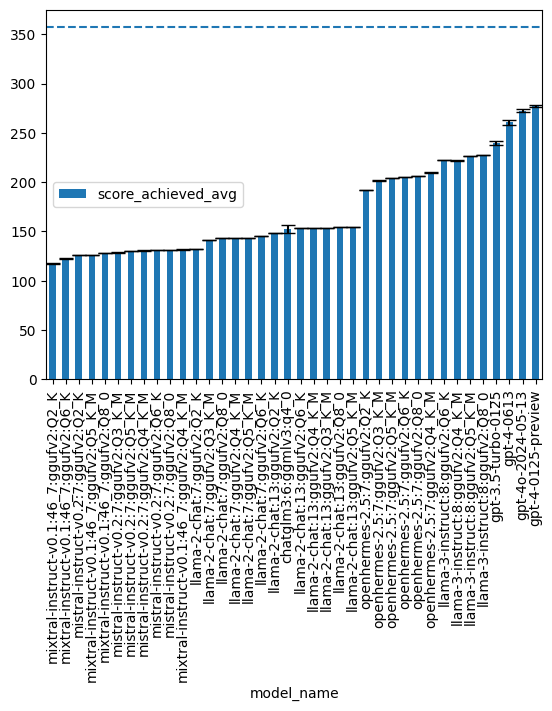

In [15]:
df = agg[1].copy()
df = df.sort_values(by="score_achieved_avg", ascending=True)

ax = df.plot.bar(x="model_name", y="score_achieved_avg", yerr="score_achieved_std", capsize = 5)
plt.axhline(y=df.iloc[:, 1][0], linestyle="--")

In [74]:
df = agg[1].copy()
df = df.sort_values(by="score_achieved_avg", ascending=True)

best_model = df.iloc[-1]
worst_model = df.iloc[0]
best_model_name = best_model.iloc[0]
worst_model_name = worst_model.iloc[0]

# Best Model Analysis

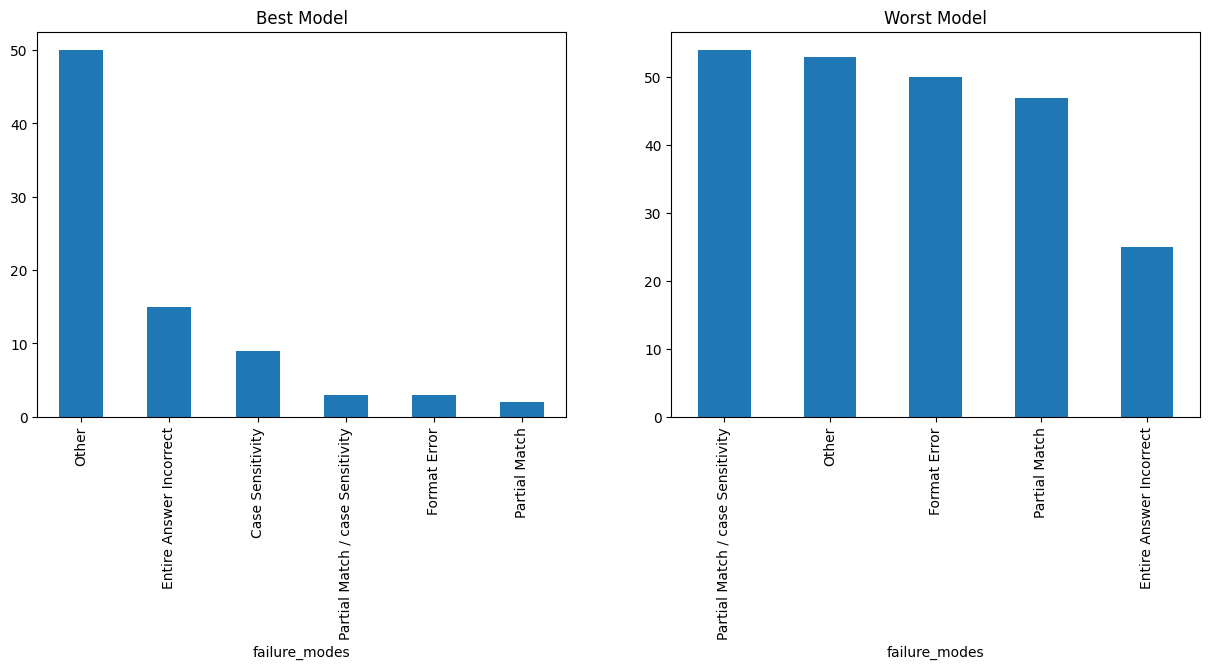

In [75]:
dfs = []
titels = ["Best", "Worst"]

dfs.append(medical_failure.query("model_name == @best_model_name"))
dfs.append(medical_failure.query("model_name == @worst_model_name"))

fig, ax = plt.subplots(1,2, figsize=(15,5))
for i, df in enumerate(dfs):
    failure_mode_count = df["failure_modes"].value_counts()
    failure_mode_count.plot.bar(ax=ax[i], title=f"{titels[i]} Model")

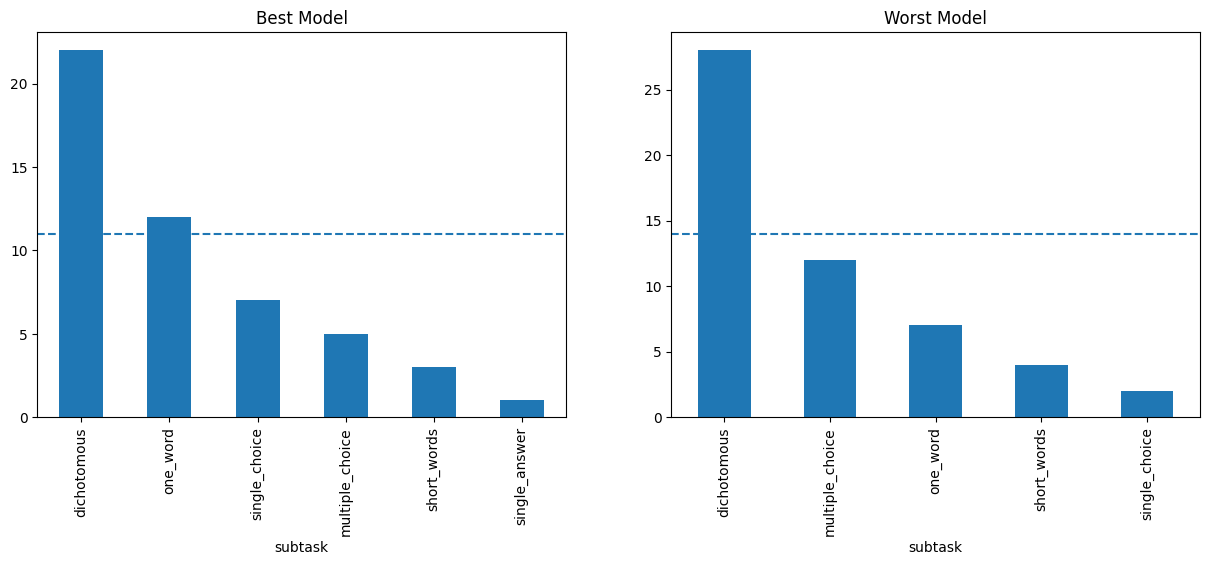

In [80]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
for i, df in enumerate(dfs):
    question_type =  df.query("failure_modes == 'Other'")
    question_type = question_type['subtask'].str.split(':').str[0]
    subtask_counts = question_type.value_counts()
    subtask_counts.plot.bar(ax=ax[i], title=f"{titels[i]} Model")
    y_hline = subtask_counts.max() / 2
    ax[i].axhline(y=y_hline, linestyle="--")

# Unterschied der Model